<h1 style="font-size:2em; text-align: center;">Cleaning the Data</h1>

In [14]:
import pandas as pd
#import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

In [15]:
# This gets data for county off of gender, ethnicity and removing nation and state levels

master_df = pd.read_csv("Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County.csv", sep=",")

#removes the insufficient data columns
rem_null_overall_df = master_df[master_df['Data_Value_Footnote'].isnull()]

#gets only male/female
only_gen_overall_df = rem_null_overall_df[rem_null_overall_df['Stratification1'] != 'Overall']

#removes the overall for the ethnicity
only_eth_overall_df = only_gen_overall_df[only_gen_overall_df['Stratification2'] != 'Overall']

#only gets the county
only_county_overall_df = only_eth_overall_df[only_eth_overall_df['GeographicLevel'] == 'County']

#get the columns we are only using
desired_columns = ['LocationAbbr', 'LocationDesc', 'Data_Value', 'Stratification1', 'Stratification2']
cleaned_county_df = only_county_overall_df[desired_columns]

#Renamed the columns to better naming for the project
cleaned_county_df.columns = ['State', 'County', 'Heart Disease per 100k', 'Gender', 'Ethnicity']

#Validated the column total (I checked against the excel and made sure this was correct)
#print(len(cleaned_county_df))

#Checking the data
cleaned_county_df.head()


,State,County,Heart Disease per 100k,Gender,Ethnicity
102,AK,Anchorage,317.5,Male,White
105,AK,Denali,400.7,Male,White
106,AK,Fairbanks North Star,401.0,Male,White
107,AK,Haines,385.5,Male,White
108,AK,Juneau,281.6,Male,White


In [16]:
#This block is to get the clean county overall data only 

rem_null_overall_df = master_df[master_df['Data_Value_Footnote'].isnull()]

#gets overall for gender
only_gen_overall_df = rem_null_overall_df[rem_null_overall_df['Stratification1'] == 'Overall']

#gets overall for ethnicity
only_eth_overall_df = only_gen_overall_df[only_gen_overall_df['Stratification2'] == 'Overall']

#only gets the county
only_county_overall_df = only_eth_overall_df[only_eth_overall_df['GeographicLevel'] == 'County']

#get the columns we are only using
cleaned_county_overall_df = only_county_overall_df[desired_columns]

#Renamed the columns to better naming for the project
cleaned_county_overall_df.columns = ['State', 'County', 'Heart Disease per 100k', 'Gender', 'Ethnicity']


#Validated the column total (Verfied the excel and its correct) 
#print(len(cleaned_county_overall_df))

cleaned_county_overall_df.head()

,State,County,Heart Disease per 100k,Gender,Ethnicity
0,AK,Aleutians East,105.3,Overall,Overall
1,AK,Aleutians West,211.9,Overall,Overall
2,AK,Anchorage,257.9,Overall,Overall
3,AK,Bethel,351.6,Overall,Overall
5,AK,Denali,305.5,Overall,Overall


In [17]:
#This finds the outliers
def find_outliers_iqr(df, column):
    data = df[column]

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = (data < lower_bound) | (data > upper_bound)

    df = df[~outliers]

    return df

#cleaned_county_df

cleaned_county_df = find_outliers_iqr(cleaned_county_df, 'Heart Disease per 100k')
cleaned_county_overall_df = find_outliers_iqr(cleaned_county_overall_df, 'Heart Disease per 100k')


<h1 style="font-size:2em; text-align: center;">Exploratory Data Analysis</h1>

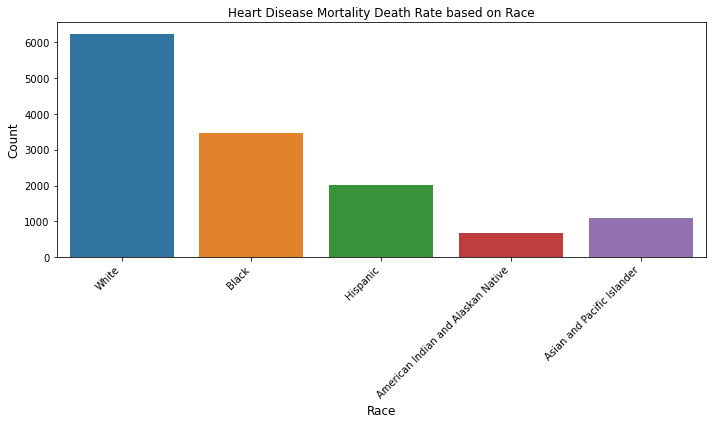

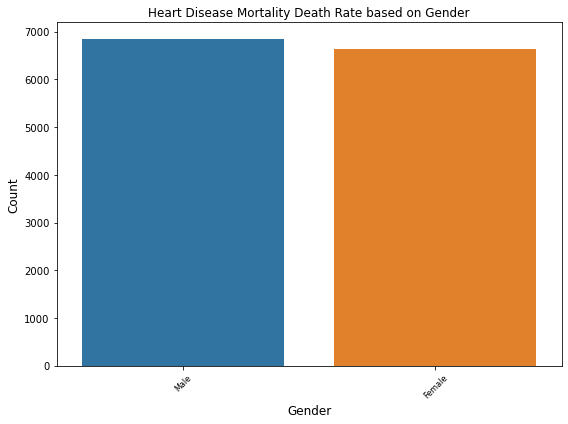

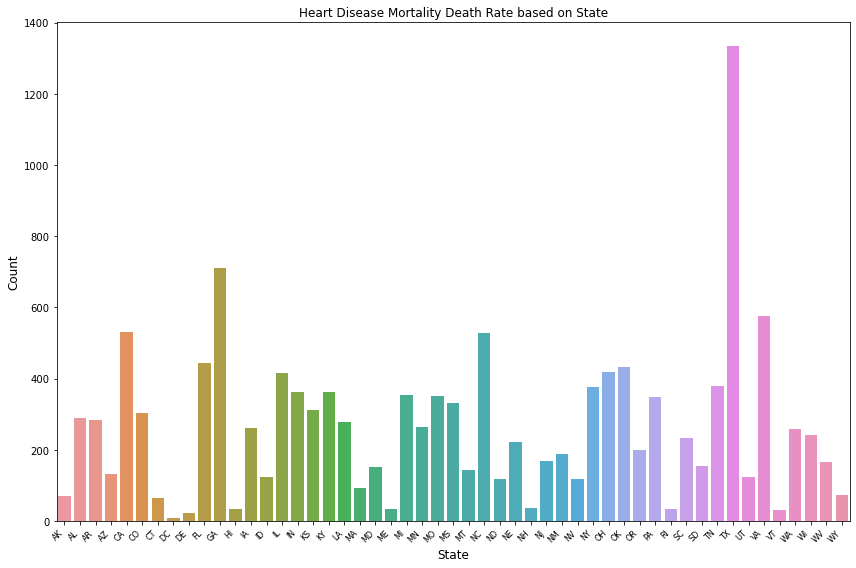

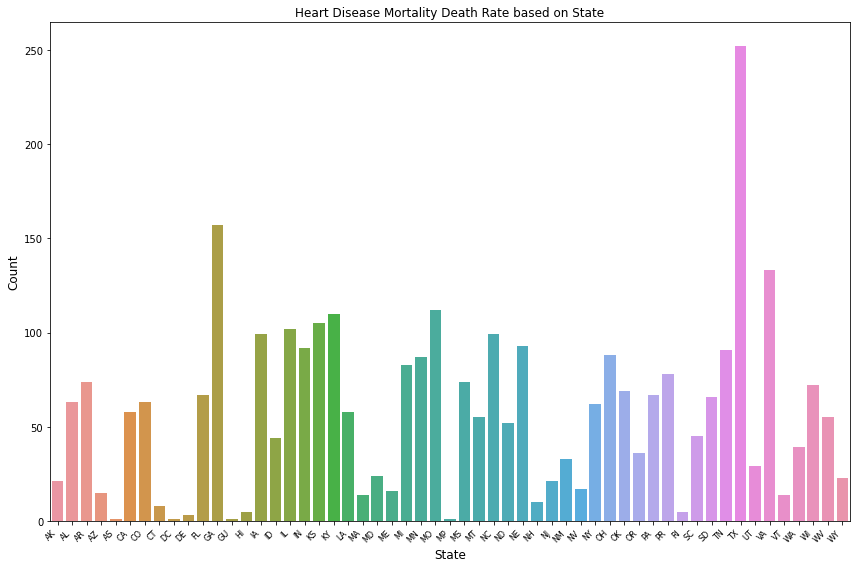

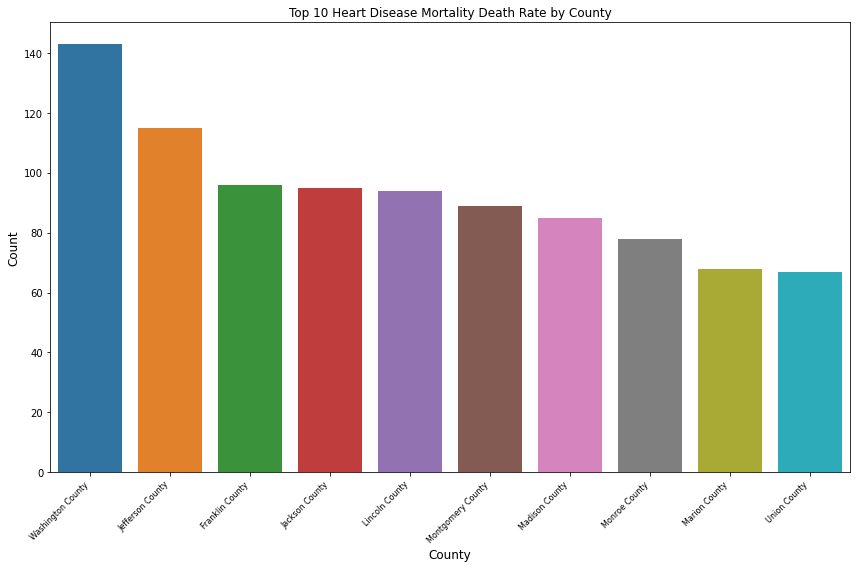

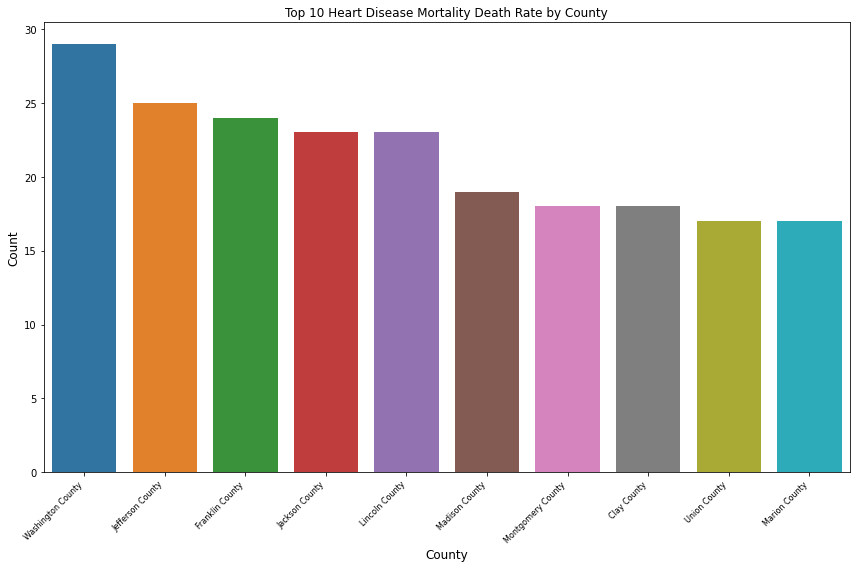

In [18]:
#Below is for Ethnicity

plt.figure(figsize=(10, 6))  # Countplot for Ethnicity
sns.countplot(data=cleaned_county_df, x='Ethnicity')
plt.title('Heart Disease Mortality Death Rate based on Race', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels by 45 degrees and align them to the right
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping

# Below is for Gender

plt.figure(figsize=(8, 6))  # Countplot for Gender
sns.countplot(data=cleaned_county_df, x='Gender')
plt.title('Heart Disease Mortality Death Rate based on Gender', fontsize=12)
plt.xticks(rotation=45, fontsize=8)  # Decrease font size
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


#Below is for States

plt.figure(figsize=(12, 8))  # Countplot for State 
sns.countplot(data=cleaned_county_df, x='State')
plt.title('Heart Disease Mortality Death Rate based on State', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Decrease font size
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

plt.figure(figsize=(12, 8))  # Countplot for State Overall
sns.countplot(data=cleaned_county_overall_df, x='State')
plt.title('Heart Disease Mortality Death Rate based on State', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Decrease font size
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



#Below is the top 10 counties

# Calculate the top 10 counties based on heart disease mortality death rate
top_counties = cleaned_county_df['County'].value_counts().nlargest(10).index
top_counties_overall = cleaned_county_overall_df['County'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 counties
top_county_data = cleaned_county_df[cleaned_county_df['County'].isin(top_counties)]
top_county_data_overall = cleaned_county_overall_df[cleaned_county_overall_df['County'].isin(top_counties_overall)]

plt.figure(figsize=(12, 8))
sns.countplot(data=top_county_data, x='County', order=top_counties)
plt.title('Top 10 Heart Disease Mortality Death Rate by County', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('County', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=top_county_data_overall, x='County', order=top_counties_overall)
plt.title('Top 10 Heart Disease Mortality Death Rate by County', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('County', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()



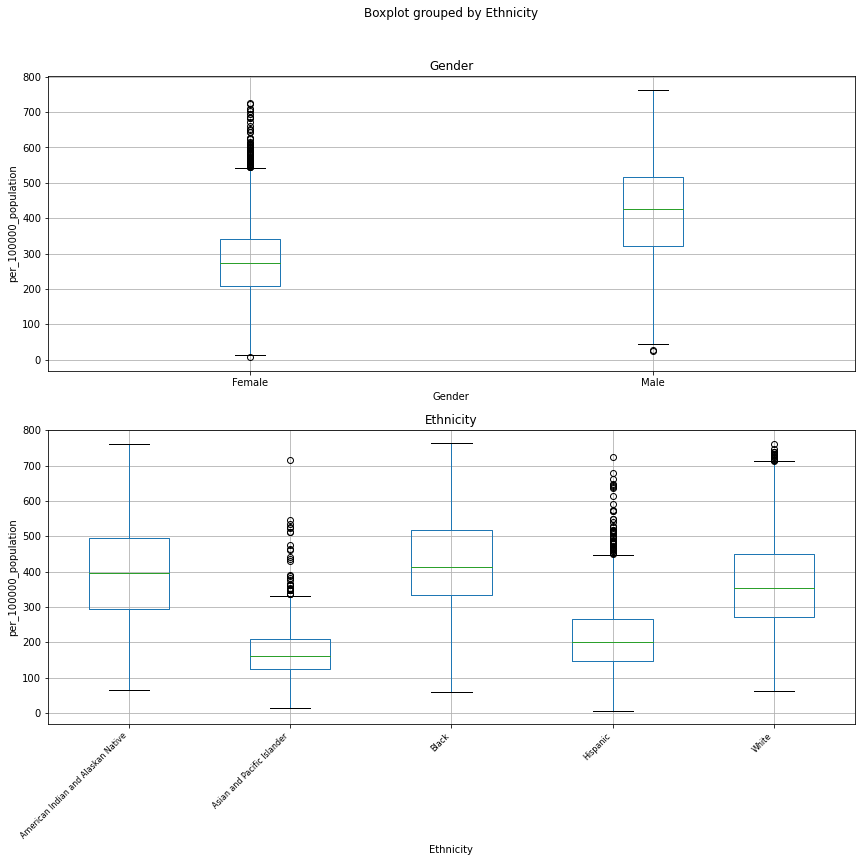

In [19]:
# Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Box plot for Gender
cleaned_county_df.boxplot(column='Heart Disease per 100k', by='Gender', ax=axes[0])
axes[0].set_title('Gender')
axes[0].set_ylabel('per_100000_population')

cleaned_county_df.boxplot(column='Heart Disease per 100k', by='Ethnicity', ax=axes[1])
axes[1].set_title('Ethnicity')
axes[1].set_ylabel('per_100000_population')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()



In [20]:
# Chi-square test for gender
contingency_gender = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['Gender'])
chi2_stat_gender, p_val_gender, _, _ = chi2_contingency(contingency_gender)

# Chi-square test for race
contingency_race = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['Ethnicity'])
chi2_stat_race, p_val_race, _, _ = chi2_contingency(contingency_race)

# Chi-square test for county
contingency_geo = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['County'])
chi2_stat_geo, p_val_geo, _, _ = chi2_contingency(contingency_geo)

contingency_state = pd.crosstab(cleaned_county_df['Heart Disease per 100k'], cleaned_county_df['State'])
chi2_stat_state, p_val_state, _, _ = chi2_contingency(contingency_state)


# Create a DataFrame for the chi-square statistics and p-values
data = {
    'Category': ['Gender', 'Ethnicity', 'County', 'State'],
    'Chi-square statistic': [chi2_stat_gender, chi2_stat_race, chi2_stat_geo, chi2_stat_state],
    'p-value': [p_val_gender, p_val_race, p_val_geo, p_val_state]
}

# Create the DataFrame for Chi-Square test
chi_square_df = pd.DataFrame(data)

# Print the DataFrame
print(chi_square_df)

    Category  Chi-square statistic        p-value
0     Gender          7.171499e+03   3.097805e-69
1  Ethnicity          2.560000e+04  2.355235e-111
2     County          9.512658e+06   1.000000e+00
3      State          2.557907e+05   9.999865e-01


<h1>Model Selection and Analysis</h1>

<h2>Linear Regression and Clustering (IDK if i will get to clustering)</h2>

In [29]:
# print(cleaned_county_df.head(6))
# correlation_matrix = cleaned_county_df[['State', 'County', 'Heart Disease per 100k', 'Gender', 'Ethnicity']].corr()

# # print("Correlation Matrix:")
# # print(correlation_matrix)

In [22]:
# This is hypothesis on gender 
import statsmodels.api as sm




gender_regression_df = cleaned_county_df.copy()

print(cleaned_county_df['Gender'])



# Convert 'Gender' to dummy variables
# Now 'Gender' will be encoded as 0 for Male and 1 for Female
gender_regression_df['Gender'] = pd.get_dummies(gender_regression_df['Gender'], drop_first=True)

print(gender_regression_df['Gender'])

x_gender = gender_regression_df['Gender']
y_heart = gender_regression_df['Heart Disease per 100k']

x_gender = sm.add_constant(x_gender)

gender_regression_model = sm.OLS(y_heart, x_gender).fit()

print(gender_regression_model.summary())
"""
R-Squared shows 23.6% of variability of the heart disease is explained by gender
F statistic 4167 the model is significiantly better fit than a model with no predictors 
prob of F statistics is close to 0 which proves that gender is related to heart disease
Log-likelohood is for model comparison. Higher is better
AIC, BIC are for other model comparisons. the lower is better

males = 1
females 0 
Const coef: this is to show when all values are 0 (Gender = 0 = female) which shows female average is 275.9 units
Gender Coef: males have a higher disease mortality rate by 139.94 unites
t stat: shows gender is statistically significant
P>|t|: shows the pvalue are close to .00 so are significant
omnibus: this is small so it si normally distributed
prob(omnibus): higher values so it shows it nromal 
Durbin-Watson: Since it is not close to two this show significant autocorrelation
Cond. No. : This measure multicollinearity. Values greater than 30 indicate multicollinearity

MODEL AND DATA IS SIGNIFICANT

"""


102        Male
105        Male
106        Male
107        Male
108        Male
          ...  
59035      Male
59038      Male
59055    Female
59059    Female
59067    Female
Name: Gender, Length: 13484, dtype: object
102      1
105      1
106      1
107      1
108      1
        ..
59035    1
59038    1
59055    0
59059    0
59067    0
Name: Gender, Length: 13484, dtype: uint8
                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.236
Model:                                OLS   Adj. R-squared:                  0.236
Method:                     Least Squares   F-statistic:                     4167.
Date:                    Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                            15:34:12   Log-Likelihood:                -84329.
No. Observations:                   13484   AIC:                         1.687e+05
Df Residuals:                       1

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\nR-Squared shows 23.6% of variability of the heart disease is explained by gender\nF statistic 4167 the model is significiantly better fit than a model with no predictors \nprob of F statistics is close to 0 which proves that gender is related to heart disease\nLog-likelohood is for model comparison. Higher is better\nAIC, BIC are for other model comparisons. the lower is better\n\nmales = 1\nfemales 0 \nConst coef: this is to show when all values are 0 (Gender = 0 = female) which shows female average is 275.9 units\nGender Coef: males have a higher disease mortality rate by 139.94 unites\nt stat: shows gender is statistically significant\nP>|t|: shows the pvalue are close to .00 so are significant\nomnibus: this is small so it si normally distributed\nprob(omnibus): higher values so it shows it nromal \nDurbin-Watson: Since it is not close to two this show significant autocorrelation\nCond. No. : This measure multicollinearity. Values greater than 30 indicate multicollinearity\n\nMO

In [23]:
ethnicity_regression_df = cleaned_county_df.copy()

ethnicity_dummies = pd.get_dummies(ethnicity_regression_df['Ethnicity'])

ethnicity_regression_dummies = pd.concat([ethnicity_regression_df, ethnicity_dummies], axis = 1)

#ethnicity_regression_dummies.head()

x_ethnicity = ethnicity_regression_dummies[['White', 'Black', 'Hispanic', 'American Indian and Alaskan Native', 'Asian and Pacific Islander']]
y_heart = ethnicity_regression_dummies['Heart Disease per 100k']

x_ethnicity = sm.add_constant(x_ethnicity)

ethnicity_regression_model = sm.OLS(y_heart, x_ethnicity).fit()

print(ethnicity_regression_model.summary())

"""
R-Squared: 28% of the data is explained by ethnicity
F statistic: 1329 show model is significant
prob of F statistics: is close to 0 which shows it significant

Log-likelohood: is for model comparison. Higher is better
AIC, BIC: are for other model comparisons. the lower is better

Const coef: the average when no one has ethnicity (the default is assumed white)
rest of Coef: average heart disease for each gender
t stat: larger absolutes values indicate greater evidence against the null hypothesis
P>|t|: no significance since close to 1


MODEL is significant but the data is not

"""

                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.340
Model:                                OLS   Adj. R-squared:                  0.340
Method:                     Least Squares   F-statistic:                     1737.
Date:                    Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                            15:34:13   Log-Likelihood:                -83342.
No. Observations:                   13484   AIC:                         1.667e+05
Df Residuals:                       13479   BIC:                         1.667e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\nR-Squared: 28% of the data is explained by ethnicity\nF statistic: 1329 show model is significant\nprob of F statistics: is close to 0 which shows it significant\n\nLog-likelohood: is for model comparison. Higher is better\nAIC, BIC: are for other model comparisons. the lower is better\n\nConst coef: the average when no one has ethnicity (the default is assumed white)\nrest of Coef: average heart disease for each gender\nt stat: larger absolutes values indicate greater evidence against the null hypothesis\nP>|t|: no significance since close to 1\n\n\nMODEL is significant but the data is not\n\n'

In [24]:
#removing multi colinearity from the ethnicity
#had to remove it by dropping white. It is assumed that if any other ethnicity has 0  (false) that means they are white
from statsmodels.stats.outliers_influence import variance_inflation_factor


ethnicity_regression_dummies_noCol = ethnicity_regression_dummies.copy()

ethnicity_regression_dummies_noCol = ethnicity_regression_dummies_noCol.drop(columns=['White'])

x_no_white = ethnicity_regression_dummies_noCol[['Black', 'Hispanic', 'American Indian and Alaskan Native', 'Asian and Pacific Islander']]
y_heart = ethnicity_regression_dummies['Heart Disease per 100k']

vif_data = x_no_white.copy()
vif_data = sm.add_constant(vif_data)  # Add constant for intercept
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
high_vif_variables = vif[vif["VIF"] > 10]["Variable"].tolist()
x_no_white = x_no_white.drop(columns=high_vif_variables)

x_no_white = sm.add_constant(x_no_white)  # Add constant for intercept
model = sm.OLS(y_heart, x_no_white).fit()

print("\nModel Summary After Addressing Multicollinearity:")
print(model.summary())

"""
R-Squared: 31% of the data is explained by ethnicity
F statistic: 1529 show model is significant
prob of F statistics: is close to 0 which shows it significant

Log-likelohood(neg does not matter): is for model comparison. Higher is better
AIC, BIC: are for other model comparisons. the lower is better

Const coef: the average when no one has ethnicity (the default is assumed white)
black coef: higher than white
hispanic coef: lower than white
indian coef: higer than white
asian coef: worse than white
t stat: larger absolutes values indicate greater evidence against the null hypothesis
P>|t|: significance since close to .00

MODEL AND DATA IS SIGNIFICANT


"""




Model Summary After Addressing Multicollinearity:
                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.340
Model:                                OLS   Adj. R-squared:                  0.340
Method:                     Least Squares   F-statistic:                     1737.
Date:                    Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                            15:34:13   Log-Likelihood:                -83342.
No. Observations:                   13484   AIC:                         1.667e+05
Df Residuals:                       13479   BIC:                         1.667e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\nR-Squared: 31% of the data is explained by ethnicity\nF statistic: 1529 show model is significant\nprob of F statistics: is close to 0 which shows it significant\n\nLog-likelohood(neg does not matter): is for model comparison. Higher is better\nAIC, BIC: are for other model comparisons. the lower is better\n\nConst coef: the average when no one has ethnicity (the default is assumed white)\nblack coef: higher than white\nhispanic coef: lower than white\nindian coef: higer than white\nasian coef: worse than white\nt stat: larger absolutes values indicate greater evidence against the null hypothesis\nP>|t|: significance since close to .00\n\nMODEL AND DATA IS SIGNIFICANT\n\n\n'

In [25]:
#alaska is the default
# vif is addressing the inflation

state_regression_df = cleaned_county_df.copy()
state_regression_encode = pd.get_dummies(state_regression_df, columns=['State'], drop_first=True)


x_hot_encoded_state = state_regression_encode.drop(['Heart Disease per 100k', 'County', 'Gender', 'Ethnicity'], axis=1)  # Predictor variables
y_heart = state_regression_encode['Heart Disease per 100k']


#x_hot_encoded_state = sm.add_constant(x_hot_encoded_state)

#print(x_hot_encoded_state)

vif_data_state = x_hot_encoded_state.copy()
vif_data_state = sm.add_constant(vif_data_state)
vif_state = pd.DataFrame()
vif_state["Variable"] = vif_data_state.columns
vif_state["VIF"] = [variance_inflation_factor(vif_data_state.values, i) for i in range(vif_data_state.shape[1])]


#high_vif_variables = vif[vif["VIF"] > 10]["Variable"].tolist()
high_vif_variables = vif_state[vif_state["VIF"] > 10]["Variable"].tolist()

high_vif_variables.remove('const')
x_hot_encoded_state = x_hot_encoded_state.drop(columns=high_vif_variables)
#print(x_hot_encoded_state)


x_hot_encoded_state = sm.add_constant(x_hot_encoded_state)
#print(x_hot_encoded_state)
model = sm.OLS(y_heart, x_hot_encoded_state).fit()
print("\nModel Summary After Addressing Multicollinearity:")
print(model.summary())

"""
R-Squared: 16% of the data is explained by ethnicity
F statistic: 54 show model is significant
prob of F statistics: is close to 0 which shows it significant

Log-likelohood(neg does not matter): is for model comparison. Higher is better
AIC, BIC: are for other model comparisons. the lower is better

Const coef: the average when no one has state (the default is assumed alaska)
black coef: higher than white
hispanic coef: lower than white
indian coef: higer than white
asian coef: worse than white
t stat: larger absolutes values indicate greater evidence against the null hypothesis
P>|t|: Depends on the state some of them are not significant. These would be the states to study

MODEL AND DATA IS SIGNIFICANT (depending on state)

based off the chi square test this shows that these results for signficant contribution to heart disease mortality 
can be due to random chance. The best is to look at the countries that do no if you want to deep dive more and 
go under the assumption this is not random chance.
"""





# print(state_encode.tail(50))

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



Model Summary After Addressing Multicollinearity:
                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.165
Model:                                OLS   Adj. R-squared:                  0.162
Method:                     Least Squares   F-statistic:                     55.22
Date:                    Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                            15:34:14   Log-Likelihood:                -84931.
No. Observations:                   13484   AIC:                         1.700e+05
Df Residuals:                       13435   BIC:                         1.703e+05
Df Model:                              48                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

'\nR-Squared: 16% of the data is explained by ethnicity\nF statistic: 54 show model is significant\nprob of F statistics: is close to 0 which shows it significant\n\nLog-likelohood(neg does not matter): is for model comparison. Higher is better\nAIC, BIC: are for other model comparisons. the lower is better\n\nConst coef: the average when no one has state (the default is assumed alaska)\nblack coef: higher than white\nhispanic coef: lower than white\nindian coef: higer than white\nasian coef: worse than white\nt stat: larger absolutes values indicate greater evidence against the null hypothesis\nP>|t|: Depends on the state some of them are not significant. These would be the states to study\n\nMODEL AND DATA IS SIGNIFICANT (depending on state)\n\nbased off the chi square test this shows that these results for signficant contribution to heart disease mortality \ncan be due to random chance. The best is to look at the countries that do no if you want to deep dive more and \ngo under the 

In [26]:
default_white_race = x_no_white.drop(columns='const') #have already been vifed since took previously
combined = pd.concat([gender_regression_df[['Gender', 'Heart Disease per 100k']], default_white_race], axis=1)


x_comb = combined.drop('Heart Disease per 100k', axis=1)
y_comb = combined['Heart Disease per 100k']

x_comb = sm.add_constant(x_comb)

model = sm.OLS(y_comb, x_comb).fit()


print(model.summary())

"""
R-Squared: 58% of the data is explained by ethnicity
F statistic: 3816 show model is significant
prob of F statistics: is close to 0 which shows it significant

Log-likelohood(neg does not matter): is for model comparison. Higher is better
AIC, BIC: are for other model comparisons. the lower is better

Const coef: the average when someone is a white female (all other refs are 0)
Gender coef: being male increases 142 units
black coef: being black incerease by 60
hispanic coef: lowers by 155
indian coef: higher by 28
asian coef: being asian lowers by 196
t stat: larger absolutes values indicate greater evidence against the null hypothesis
P>|t|: significance since close to .00

MODEL AND DATA IS SIGNIFICANT



"""



                              OLS Regression Results                              
Dep. Variable:     Heart Disease per 100k   R-squared:                       0.586
Model:                                OLS   Adj. R-squared:                  0.586
Method:                     Least Squares   F-statistic:                     3816.
Date:                    Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                            15:34:14   Log-Likelihood:                -80198.
No. Observations:                   13484   AIC:                         1.604e+05
Df Residuals:                       13478   BIC:                         1.605e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

c:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\nR-Squared: 58% of the data is explained by ethnicity\nF statistic: 3816 show model is significant\nprob of F statistics: is close to 0 which shows it significant\n\nLog-likelohood(neg does not matter): is for model comparison. Higher is better\nAIC, BIC: are for other model comparisons. the lower is better\n\nConst coef: the average when someone is a white female (all other refs are 0)\nGender coef: being male increases 142 units\nblack coef: being black incerease by 60\nhispanic coef: lowers by 155\nindian coef: higher by 28\nasian coef: being asian lowers by 196\nt stat: larger absolutes values indicate greater evidence against the null hypothesis\nP>|t|: significance since close to .00\n\nMODEL AND DATA IS SIGNIFICANT\n\n\n\n'

<h2>Linear Regression Visual Modeling </h2>

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

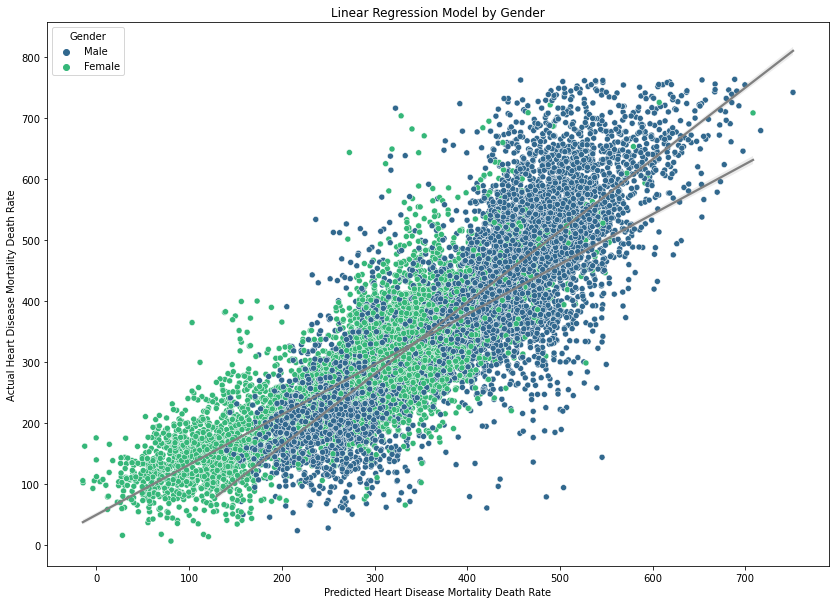

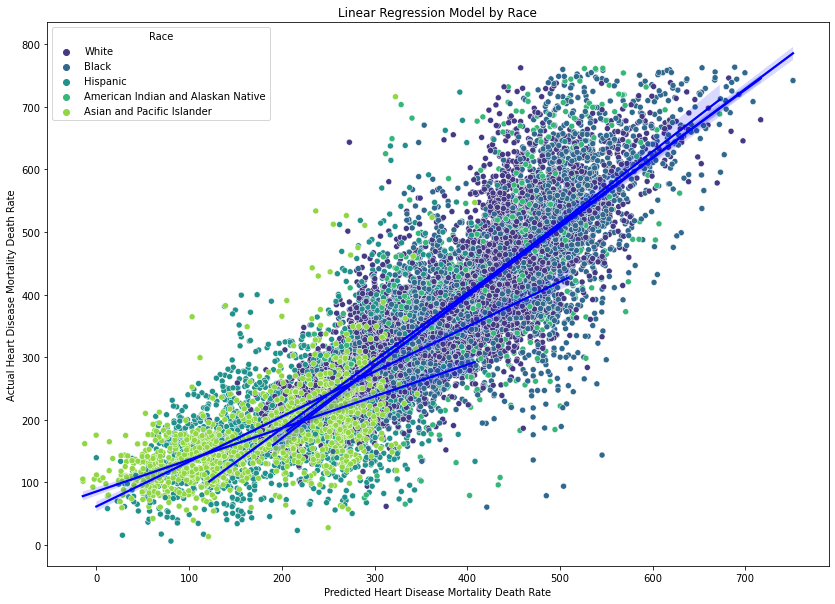

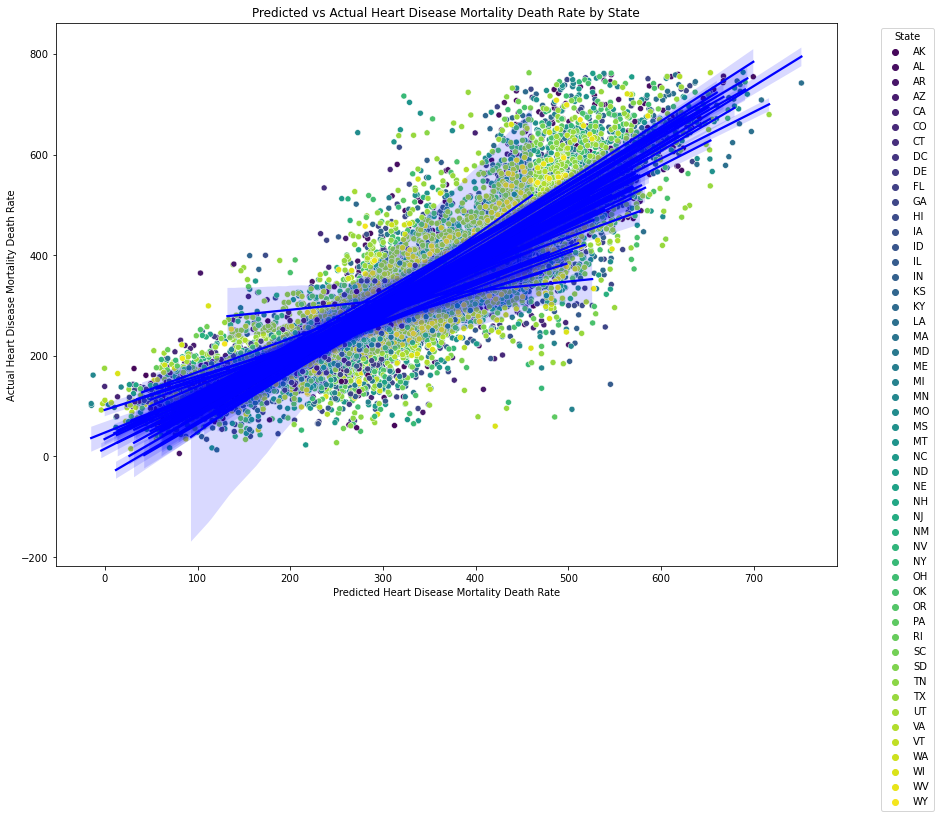

In [28]:
# Selecting relevant columns
X = cleaned_county_df[['Gender', 'Ethnicity', 'County']]
y = cleaned_county_df['Heart Disease per 100k']

# Define preprocessing steps for encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Ethnicity', 'County'])  # One-hot encode categorical variables
    ],
    remainder='passthrough'  # Pass through any remaining columns
)

# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Linear regression model
])

# Fit the pipeline on the data
pipeline.fit(X, y)

# Predict heart disease mortality death rate
y_pred = pipeline.predict(X)


plt.figure(figsize=(14, 10))
sns.scatterplot(data=cleaned_county_df, x=y_pred, y=y, hue='Gender', palette='viridis', legend='full')
for category in cleaned_county_df['Gender'].unique():
    category_mask = (cleaned_county_df['Gender'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='gray')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Linear Regression Model by Gender')
plt.legend(title='Gender')
plt.show()


# Plot for Race
plt.figure(figsize=(14, 10))
sns.scatterplot(data=cleaned_county_df, x=y_pred, y=y, hue='Ethnicity', palette='viridis', legend='full')
for category in cleaned_county_df['Ethnicity'].unique():
    category_mask = (cleaned_county_df['Ethnicity'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='blue')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Linear Regression Model by Race')
plt.legend(title='Race')
plt.show()

# Plot for County
plt.figure(figsize=(14, 10))
sns.scatterplot(data=cleaned_county_df, x=y_pred, y=y, hue='State', palette='viridis')
for category in cleaned_county_df['State'].unique():
    category_mask = (cleaned_county_df['State'] == category)
    sns.regplot(x=y_pred[category_mask], y=y[category_mask], scatter=False, color='blue')
plt.xlabel('Predicted Heart Disease Mortality Death Rate')
plt.ylabel('Actual Heart Disease Mortality Death Rate')
plt.title('Predicted vs Actual Heart Disease Mortality Death Rate by State')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()